In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Simple DFT example

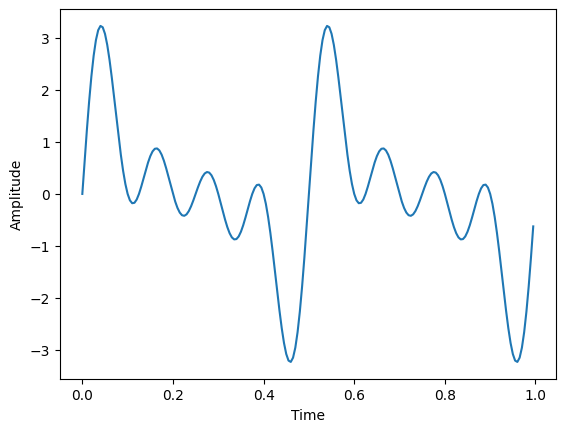

In [ ]:
#Attempt 1 Code, used with help from a youtube vid.
#Task 1 - Part 1
#Signal Creation: Create a time series input with 200 sample points (representing 1 second of audio at a sampling rate
# of 200 Hz). Generate a composite signal that includes a fundamental sin/cos wave and at least 3 harmonics.
#Sampling Rate
sr = 200
#Fundamental Frequency (Frequency of input signal)
sampleF = 2
#Sampling Interval
ts = 1.0 / sr
#Sampling Time
t = np.arange(0, 1, ts)
#Phase
phase = 0

#Harmonics
harmonics = [2,3,4]

composite = np.zeros_like(t)
composite = np.sin(2*np.pi*sampleF*t)

for harmonic in harmonics:
 composite  += np.sin(phase+2*np.pi*sampleF*harmonic*t)


plt.plot(t, composite)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



Version 2


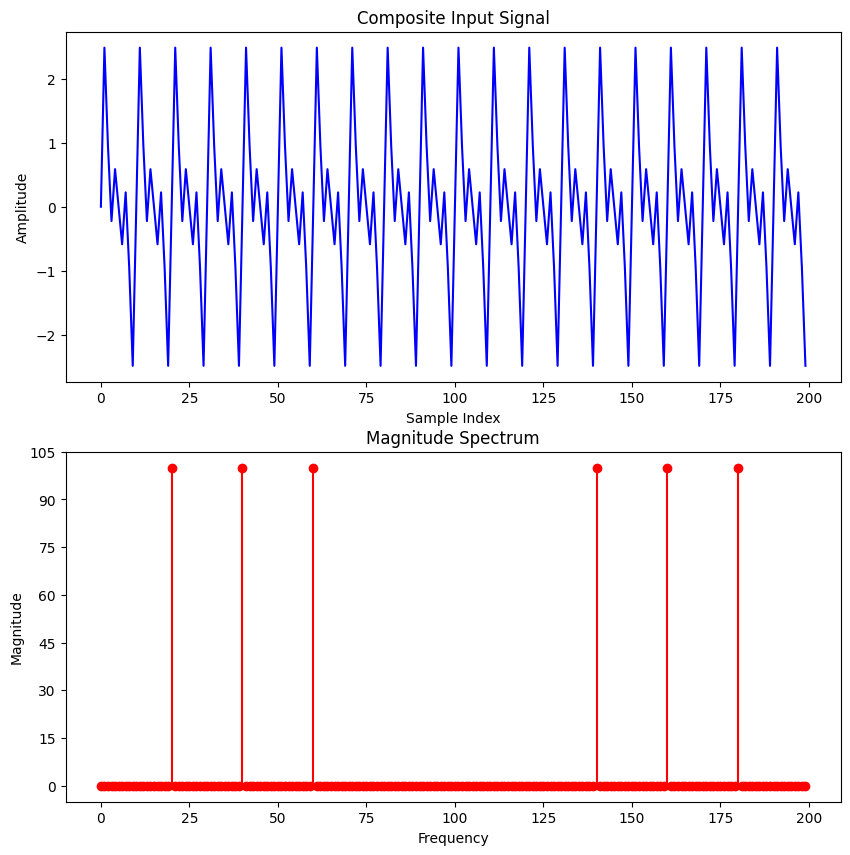

In [ ]:
#Task 1 - Part 1 - Siginal Creation 2

# Parameters
N = 200  # Number of samples
sample = np.zeros(N) #Create an array to store the samples
fundamentalF = 20  # Fundamental frequency in Hz
freqRange = N # Frequency range
Harmonics = 3  # Harmonics
phase = 0 # Set phase

# Generate composite input signal
t = np.arange(N)
composite = np.sin(phase+2*np.pi*fundamentalF*t/N)
for harmonic in range(2, Harmonics + 1):
    composite += np.sin(phase+2*np.pi*fundamentalF*harmonic*t/N)

# Perform DFT
output = np.abs(np.fft.fft(composite)[:freqRange])

# Plot signals
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(10, 10))

ax0.plot(t, composite,  color='blue')
ax0.set_title('Composite Input Signal')
ax0.set_xlabel('Sample Size')
ax0.set_ylabel('Amplitude')

ax1.stem(range(len(output)), output, basefmt=" ", linefmt="red", markerfmt="ro")
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Magnitude')


plt.show()


real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  -100
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  0 imag:  0
real:  

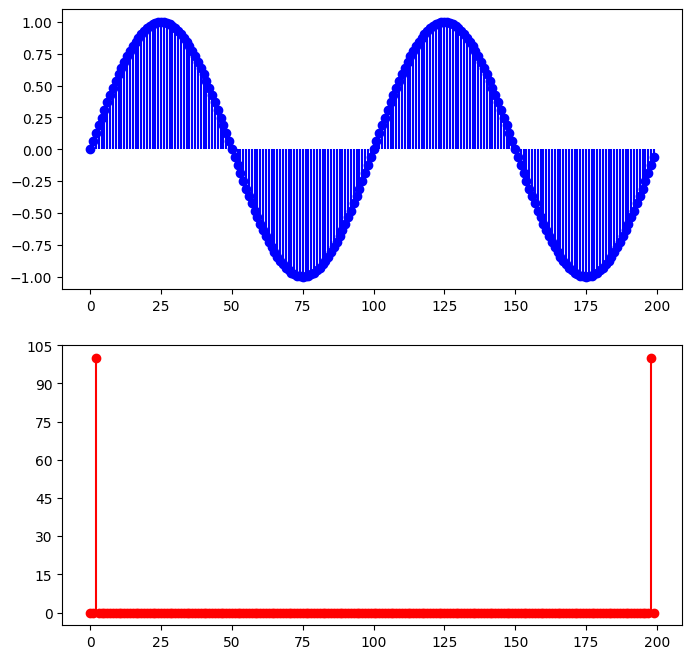

In [ ]:
#Task 1 - Part 2, Manual DFT Calculation

# Generate the input signal samples
for i in range(N):
    # Generate a sinusoidal wave
    currentSample = np.sin(phase + 2*np.pi*sampleF*i/N)
    sample[i] = currentSample

# Calculate DFT coefficients the hard way - complex exponential matrix

K = freqRange

for k in range(K):
    sum = complex(0,0)

    for n in range(N):
        # Calculate the real and imaginary parts of the complex exponential
        realPart = np.cos(2*np.pi*k*n/N)
        imagPart = np.sin(2*np.pi*k*n/N)
        # Create the complex exponential
        w = complex(realPart, -imagPart)

        # Multiply the sample with the complex exponential and accumulate the sum
        sum += sample[n] * w

    # Calculate the magnitude of the sum and store it in the output array
    output[k] = np.abs(sum)

# Print the real and imaginary parts of the sum
    print("real: ", round(sum.real), "imag: ", round(sum.imag))
# Plot the input and output signals
figure, axis = plt.subplots(2, figsize=(8, 8))

axis[0].stem(range(len(sample)), sample, basefmt=" ", linefmt="blue", markerfmt="bo")
axis[1].stem(range(len(output)), output, basefmt=" ", linefmt="red", markerfmt="ro")
axis[1].xaxis.set_major_locator(MaxNLocator(integer=True))
axis[1].yaxis.set_major_locator(MaxNLocator(integer=True))


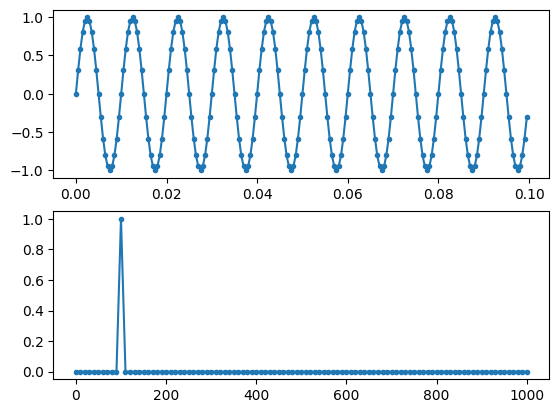

In [ ]:
#Task 1: Manual DFT Calculation - Part 3

# Use the numpy.fft function to compute the DFT of the same signal.
# Compare your manually calculated DFT with the output from numpy.fft to verify.
# Measure and compare the computation time between the manual DFT and numpy.fft.

#Construct a time signal
Fs = 2000 # Sampling freq
tstep = 1 / Fs # sample time interval
f0 = 100 # signal freq

N = int(10 *Fs / f0) # number of samples

t = np.linspace(0, (N-1)* tstep, N) # time steps
fstep = Fs / N # freq interval
f = np.linspace(0, (N-1) * fstep, N) # freq steps

equation = 1 * np.sin(2 * np.pi * f0 * t)

# Perform fft
X = np.fft.fft(equation)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2 #DC component doen't need to multiply by 2

#Time to do some plottin boys
fig, [ax1, ax2] = plt.subplots(nrows = 2, ncols = 1)
ax1.plot(t, equation, '.-') # Time domain signal
ax2.plot(f_plot, X_mag_plot, '.-') #Frequency spectrum
plt.show()


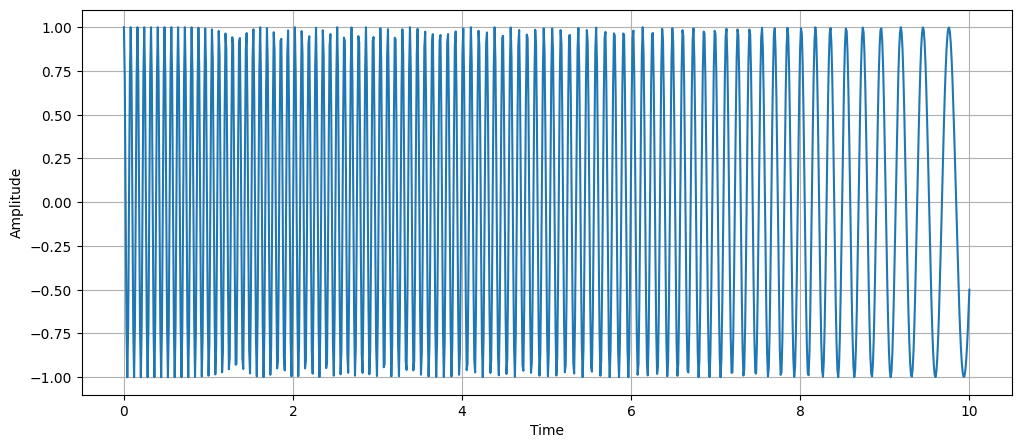

In [ ]:
#Task 2: Short-Time Fourier Transform (STFT) - Part 1
#Signal Generation: Generate a chirp signal using scipy.signal.chirp. (1000 or more samples points)

from scipy.signal import chirp

# Time = How long the chirp signal is
Time = 10
# Sample = 1000
Samples1 = 1000

#Make Chirp Signation
t = np.linspace(0, Time, Samples1)
chirp_signal = chirp(t, f0=12.5, f1=2.5, t1=10, method='quadratic')

#Time to be doin some plotin' boys Chaw haw haw!
plt.figure(figsize=(12, 5))
plt.plot(t, chirp_signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


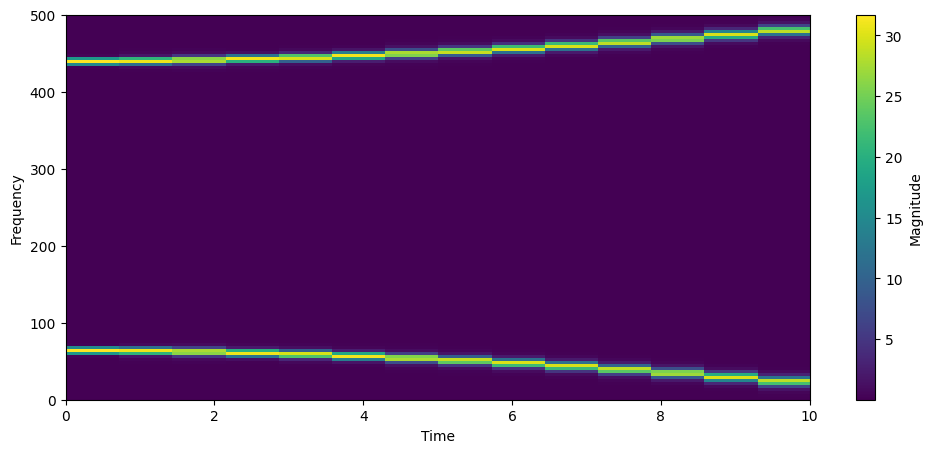

In [ ]:
#Task 2: Short-Time Fourier Transform (STFT) - Part 2 & 3
import matplotlib.pyplot as plt

#Chirp Signal
Time = 10
Samples1 = 1000
t = np.linspace(0, Time, Samples1)
chirp_signal = chirp(t, f0=12.5, f1=2.5, t1=10, method='quadratic')

# Parameters for STFT
Window = 128
Dupes = 64

# Compute STFT using numpy.fft and Hanning window
StartingPoints = Window - Dupes
STFT = np.array([np.fft.fft(np.hanning(Window) * chirp_signal[i:i+(Window)])
                        for i in range(0, len(chirp_signal)-Window, StartingPoints)])
#This creates then extracts part of then handing window with a chirp signal. Computs FFT, then stores them into an array

#Time to be doin some plotin' boys Chaw haw haw!
plt.figure(figsize=(12, 5))
plt.imshow(np.abs(STFT.T), aspect='auto', origin='lower', cmap='viridis', extent=(0, Time, 0, 500)) #HeatMap
plt.colorbar(label='Magnitude')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()
